In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
url =  'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url,
                          names=column_names,
                          na_values='?',
                          comment='\t', #remove last column
                          sep=' ',
                          skipinitialspace=True)

In [60]:
df = raw_dataset

In [61]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [62]:
df.isnull().sum() # remove the null if is small amount

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [64]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [65]:
#df.dropna(inplace=True) #remove null from original df and keep the same memory size (optimize memory)
df2 = df.dropna() #create a copy of df and take more space in memory

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [67]:
df2.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


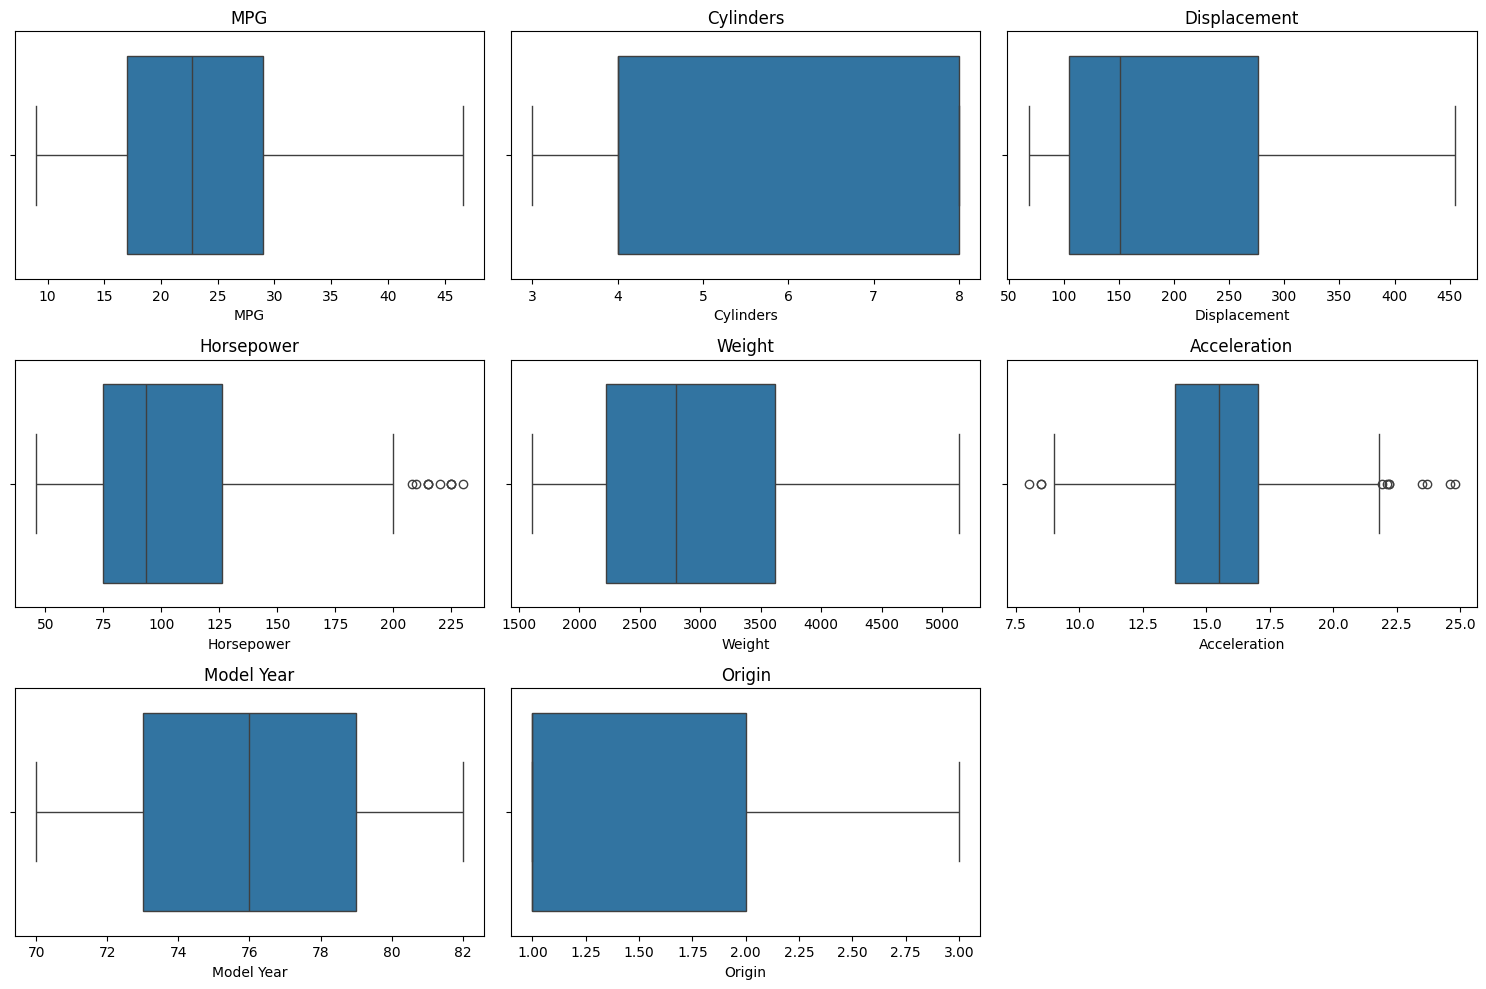

In [68]:
# Select only numerical columns for box plots
numerical_cols = df2.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [69]:
X = df2.drop(labels=['MPG'], axis=1)
y = df2['MPG']

In [70]:
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [71]:
y

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (313, 7)
X_test shape: (79, 7)
y_train shape: (313,)
y_test shape: (79,)


In [74]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
260,6,225.0,110.0,3620.0,18.7,78,1
184,4,140.0,92.0,2572.0,14.9,76,1
174,6,171.0,97.0,2984.0,14.5,75,1
64,8,318.0,150.0,4135.0,13.5,72,1
344,4,86.0,64.0,1875.0,16.4,81,1
...,...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72,1
107,6,232.0,100.0,2789.0,15.0,73,1
272,4,151.0,85.0,2855.0,17.6,78,1
352,4,98.0,65.0,2380.0,20.7,81,1


In [75]:
X_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
79,4,96.0,69.0,2189.0,18.0,72,2
276,4,121.0,115.0,2795.0,15.7,78,2
248,4,91.0,60.0,1800.0,16.4,78,3
56,4,91.0,70.0,1955.0,20.5,71,1
393,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...
366,6,225.0,85.0,3465.0,16.6,81,1
83,4,98.0,80.0,2164.0,15.0,72,1
115,8,350.0,145.0,4082.0,13.0,73,1
3,8,304.0,150.0,3433.0,12.0,70,1


In [76]:
# fit transform before scale
# fit transorm for train data and transform only for test data
# use normalization only when numirc value not categorical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [94]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model1 = LinearRegression()

# Train the model using the scaled training data
model1.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [95]:
# Make predictions on the scaled test data
y_pred_test_scaled = model1.predict(X_test_scaled)
y_pred_train_scaled = model1.predict(X_train_scaled)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the scaled test data
y_pred_test_scaled = model1.predict(X_test_scaled)
y_pred_train_scaled = model1.predict(X_train_scaled)

# Calculate evaluation metrics on scaled test data
mse_test = mean_squared_error(y_test_scaled, y_pred_test_scaled)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_scaled, y_pred_test_scaled)
r2_test = r2_score(y_test_scaled, y_pred_test_scaled)

# Calculate evaluation metrics on scaled train data
mse_train = mean_squared_error(y_train_scaled, y_pred_train_scaled)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_scaled, y_pred_train_scaled)
r2_train = r2_score(y_train_scaled, y_pred_train_scaled)


# Print the evaluation metrics
print("--- Test Data Metrics ---")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2):", r2_test)
print("\n--- Train Data Metrics ---")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R2):", r2_train)

--- Test Data Metrics ---
Mean Squared Error (MSE): 0.007576154664751015
Root Mean Squared Error (RMSE): 0.08704110905055734
Mean Absolute Error (MAE): 0.06435585769142163
R-squared (R2): 0.7901500386760345

--- Train Data Metrics ---
Mean Squared Error (MSE): 0.007765996945997538
Root Mean Squared Error (RMSE): 0.08812489401978046
Mean Absolute Error (MAE): 0.06777043075040257
R-squared (R2): 0.826001578671067


In [97]:
# Print the model parameters
print("Model Coefficients:", model1.coef_)
print("Model Intercept:", model1.intercept_)

Model Coefficients: [[-0.04598256  0.15470355 -0.1042426  -0.57610403  0.01695639  0.24502423
   0.08582218]]
Model Intercept: [0.45993611]


# Polynomial with degree of 2

In [101]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train polynomial regression model
model2 = LinearRegression()
model2.fit(X_train_poly, y_train_scaled)

# Make predictions on the scaled polynomial test data
y_pred_test_poly = model2.predict(X_test_poly)

# Make predictions on the scaled polynomial training data
y_pred_train_poly = model2.predict(X_train_poly)

# Calculate evaluation metrics on scaled test data
mse_test_poly = mean_squared_error(y_test_scaled, y_pred_test_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
mae_test_poly = mean_absolute_error(y_test_scaled, y_pred_test_poly)
r2_test_poly = r2_score(y_test_scaled, y_pred_test_poly)

# Calculate evaluation metrics on scaled train data
mse_train_poly = mean_squared_error(y_train_scaled, y_pred_train_poly)
rmse_train_poly = np.sqrt(mse_train_poly)
mae_train_poly = mean_absolute_error(y_train_scaled, y_pred_train_poly)
r2_train_poly = r2_score(y_train_scaled, y_pred_train_poly)

# Print the evaluation metrics
print("--- Polynomial Regression Test Data Metrics ---")
print("Mean Squared Error (MSE):", mse_test_poly)
print("Root Mean Squared Error (RMSE):", rmse_test_poly)
print("Mean Absolute Error (MAE):", mae_test_poly)
print("R-squared (R2):", r2_test_poly)

print("\n--- Polynomial Regression Train Data Metrics ---")
print("Mean Squared Error (MSE):", mse_train_poly)
print("Root Mean Squared Error (RMSE):", rmse_train_poly)
print("Mean Absolute Error (MAE):", mae_train_poly)
print("R-squared (R2):", r2_train_poly)

--- Polynomial Regression Test Data Metrics ---
Mean Squared Error (MSE): 0.005062216049461189
Root Mean Squared Error (RMSE): 0.0711492519248178
Mean Absolute Error (MAE): 0.05244537852221487
R-squared (R2): 0.8597829784104731

--- Polynomial Regression Train Data Metrics ---
Mean Squared Error (MSE): 0.004524237182854828
Root Mean Squared Error (RMSE): 0.06726245002120297
Mean Absolute Error (MAE): 0.048873148152416584
R-squared (R2): 0.8986337320232769


In [102]:
print("--- Comparison of Model Evaluation Metrics ---")
print("\nSimple Linear Regression (model1):")
print("Test R-squared (R2):", r2_test)
print("Test Mean Squared Error (MSE):", mse_test)
print("Test Root Mean Squared Error (RMSE):", rmse_test)
print("Test Mean Absolute Error (MAE):", mae_test)
print("\nPolynomial Regression (model2):")
print("Test R-squared (R2):", r2_test_poly)
print("Test Mean Squared Error (MSE):", mse_test_poly)
print("Test Root Mean Squared Error (RMSE):", rmse_test_poly)
print("Test Mean Absolute Error (MAE):", mae_test_poly)

--- Comparison of Model Evaluation Metrics ---

Simple Linear Regression (model1):
Test R-squared (R2): 0.7901500386760345
Test Mean Squared Error (MSE): 0.007576154664751015
Test Root Mean Squared Error (RMSE): 0.08704110905055734
Test Mean Absolute Error (MAE): 0.06435585769142163

Polynomial Regression (model2):
Test R-squared (R2): 0.8597829784104731
Test Mean Squared Error (MSE): 0.005062216049461189
Test Root Mean Squared Error (RMSE): 0.0711492519248178
Test Mean Absolute Error (MAE): 0.05244537852221487


# Polynomial with degree of 3

In [104]:
# Generate polynomial features with degree 3
poly_degree3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly_degree3.fit_transform(X_train_scaled)
X_test_poly3 = poly_degree3.transform(X_test_scaled)

# Train polynomial regression model with degree 3
model3 = LinearRegression()
model3.fit(X_train_poly3, y_train_scaled)

# Make predictions on the scaled polynomial test data with degree 3
y_pred_test_poly3 = model3.predict(X_test_poly3)

# Make predictions on the scaled polynomial training data with degree 3
y_pred_train_poly3 = model3.predict(X_train_poly3)

# Calculate evaluation metrics on scaled test data with degree 3
mse_test_poly3 = mean_squared_error(y_test_scaled, y_pred_test_poly3)
rmse_test_poly3 = np.sqrt(mse_test_poly3)
mae_test_poly3 = mean_absolute_error(y_test_scaled, y_pred_test_poly3)
r2_test_poly3 = r2_score(y_test_scaled, y_pred_test_poly3)

# Calculate evaluation metrics on scaled train data with degree 3
mse_train_poly3 = mean_squared_error(y_train_scaled, y_pred_train_poly3)
rmse_train_poly3 = np.sqrt(mse_train_poly3)
mae_train_poly3 = mean_absolute_error(y_train_scaled, y_pred_train_poly3)
r2_train_poly3 = r2_score(y_train_scaled, y_pred_train_poly3)

# Print the evaluation metrics
print("--- Polynomial Regression (Degree 3) Test Data Metrics ---")
print("Mean Squared Error (MSE):", mse_test_poly3)
print("Root Mean Squared Error (RMSE):", rmse_test_poly3)
print("Mean Absolute Error (MAE):", mae_test_poly3)
print("R-squared (R2):", r2_test_poly3)

print("\n--- Polynomial Regression (Degree 3) Train Data Metrics ---")
print("Mean Squared Error (MSE):", mse_train_poly3)
print("Root Mean Squared Error (RMSE):", rmse_train_poly3)
print("Mean Absolute Error (MAE):", mae_train_poly3)
print("R-squared (R2):", r2_train_poly3)

--- Polynomial Regression (Degree 3) Test Data Metrics ---
Mean Squared Error (MSE): 0.012353183443594993
Root Mean Squared Error (RMSE): 0.11114487592145214
Mean Absolute Error (MAE): 0.07980764891688377
R-squared (R2): 0.6578323460148824

--- Polynomial Regression (Degree 3) Train Data Metrics ---
Mean Squared Error (MSE): 0.0024575787859144552
Root Mean Squared Error (RMSE): 0.04957397286797231
Mean Absolute Error (MAE): 0.035650720879757174
R-squared (R2): 0.9449375486477655


# Lasso Reg

In [117]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
# You might need to tune the alpha parameter
lasso_model = Lasso(alpha=0.000030)

# Train the model using the scaled polynomial data with degree 3
lasso_model.fit(X_train_poly3, y_train_scaled)

# Make predictions on the scaled polynomial test data with degree 3
y_pred_test_lasso = lasso_model.predict(X_test_poly3)

# Make predictions on the scaled polynomial training data with degree 3
y_pred_train_lasso = lasso_model.predict(X_train_poly3)

# Calculate evaluation metrics on scaled test data with degree 3
mse_test_lasso = mean_squared_error(y_test_scaled, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
mae_test_lasso = mean_absolute_error(y_test_scaled, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test_scaled, y_pred_test_lasso)

# Calculate evaluation metrics on scaled train data with degree 3
mse_train_lasso = mean_squared_error(y_train_scaled, y_pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
mae_train_lasso = mean_absolute_error(y_train_scaled, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train_scaled, y_pred_train_lasso)

# Print the evaluation metrics
print("--- Lasso Regression (Degree 3) Test Data Metrics ---")
print("Mean Squared Error (MSE):", mse_test_lasso)
print("Root Mean Squared Error (RMSE):", rmse_test_lasso)
print("Mean Absolute Error (MAE):", mae_test_lasso)
print("R-squared (R2):", r2_test_lasso)

print("\n--- Lasso Regression (Degree 3) Train Data Metrics ---")
print("Mean Squared Error (MSE):", mse_train_lasso)
print("Root Mean Squared Error (RMSE):", rmse_train_lasso)
print("Mean Absolute Error (MAE):", mae_train_lasso)
print("R-squared (R2):", r2_train_lasso)

--- Lasso Regression (Degree 3) Test Data Metrics ---
Mean Squared Error (MSE): 0.004175987772897985
Root Mean Squared Error (RMSE): 0.06462188308071798
Mean Absolute Error (MAE): 0.0481265395202701
R-squared (R2): 0.8843303877217249

--- Lasso Regression (Degree 3) Train Data Metrics ---
Mean Squared Error (MSE): 0.0037118096487255585
Root Mean Squared Error (RMSE): 0.060924622680206715
Mean Absolute Error (MAE): 0.04439228119000469
R-squared (R2): 0.9168363027126082


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.764e-01, tolerance: 1.397e-03
  model = cd_fast.enet_coordinate_descent(


In [128]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
# You might need to tune the alpha parameter
ridge_model = Ridge(alpha=0.01)

# Train the model using the scaled polynomial data with degree 3
ridge_model.fit(X_train_poly3, y_train_scaled)

# Make predictions on the scaled polynomial test data with degree 3
y_pred_test_ridge = ridge_model.predict(X_test_poly3)

# Make predictions on the scaled polynomial training data with degree 3
y_pred_train_ridge = ridge_model.predict(X_train_poly3)

# Calculate evaluation metrics on scaled test data with degree 3
mse_test_ridge = mean_squared_error(y_test_scaled, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
mae_test_ridge = mean_absolute_error(y_test_scaled, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test_scaled, y_pred_test_ridge)

# Calculate evaluation metrics on scaled train data with degree 3
mse_train_ridge = mean_squared_error(y_train_scaled, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
mae_train_ridge = mean_absolute_error(y_train_scaled, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train_scaled, y_pred_train_ridge)

# Print the evaluation metrics
print("--- Ridge Regression (Degree 3) Test Data Metrics ---")
print("Mean Squared Error (MSE):", mse_test_ridge)
print("Root Mean Squared Error (RMSE):", rmse_test_ridge)
print("Mean Absolute Error (MAE):", mae_test_ridge)
print("R-squared (R2):", r2_test_ridge)

print("\n--- Ridge Regression (Degree 3) Train Data Metrics ---")
print("Mean Squared Error (MSE):", mse_train_ridge)
print("Root Mean Squared Error (RMSE):", rmse_train_ridge)
print("Mean Absolute Error (MAE):", mae_train_ridge)
print("R-squared (R2):", r2_train_ridge)

--- Ridge Regression (Degree 3) Test Data Metrics ---
Mean Squared Error (MSE): 0.004326627089822744
Root Mean Squared Error (RMSE): 0.06577710156143052
Mean Absolute Error (MAE): 0.049037316496699894
R-squared (R2): 0.8801578679898343

--- Ridge Regression (Degree 3) Train Data Metrics ---
Mean Squared Error (MSE): 0.0033846809611703084
Root Mean Squared Error (RMSE): 0.05817801097640163
Mean Absolute Error (MAE): 0.04182315068501614
R-squared (R2): 0.9241656740221545


In [133]:
from sklearn.linear_model import ElasticNet

# Create an Elastic Net Regression model
# You might need to tune the alpha and l1_ratio parameters
elastic_model = ElasticNet(alpha=0.00001, l1_ratio=0.01)

# Train the model using the scaled polynomial data with degree 3
elastic_model.fit(X_train_poly3, y_train_scaled)

# Make predictions on the scaled polynomial test data with degree 3
y_pred_test_elastic = elastic_model.predict(X_test_poly3)

# Make predictions on the scaled polynomial training data with degree 3
y_pred_train_elastic = elastic_model.predict(X_train_poly3)

# Calculate evaluation metrics on scaled test data with degree 3
mse_test_elastic = mean_squared_error(y_test_scaled, y_pred_test_elastic)
rmse_test_elastic = np.sqrt(mse_test_elastic)
mae_test_elastic = mean_absolute_error(y_test_scaled, y_pred_test_elastic)
r2_test_elastic = r2_score(y_test_scaled, y_pred_test_elastic)

# Calculate evaluation metrics on scaled train data with degree 3
mse_train_elastic = mean_squared_error(y_train_scaled, y_pred_train_elastic)
rmse_train_elastic = np.sqrt(mse_train_elastic)
mae_train_elastic = mean_absolute_error(y_train_scaled, y_pred_train_elastic)
r2_train_elastic = r2_score(y_train_scaled, y_pred_train_elastic)

# Print the evaluation metrics
print("--- Elastic Net Regression (Degree 3) Test Data Metrics ---")
print("Mean Squared Error (MSE):", mse_test_elastic)
print("Root Mean Squared Error (RMSE):", rmse_test_elastic)
print("Mean Absolute Error (MAE):", mae_test_elastic)
print("R-squared (R2):", r2_test_elastic)

print("\n--- Elastic Net Regression (Degree 3) Train Data Metrics ---")
print("Mean Squared Error (MSE):", mse_train_elastic)
print("Root Mean Squared Error (RMSE):", rmse_train_elastic)
print("Mean Absolute Error (MAE):", mae_train_elastic)
r2_train_elastic = r2_score(y_train_scaled, y_pred_train_elastic)
print("R-squared (R2):", r2_train_elastic)

--- Elastic Net Regression (Degree 3) Test Data Metrics ---
Mean Squared Error (MSE): 0.004967335987127165
Root Mean Squared Error (RMSE): 0.07047933021196474
Mean Absolute Error (MAE): 0.053260081055993704
R-squared (R2): 0.8624110368771049

--- Elastic Net Regression (Degree 3) Train Data Metrics ---
Mean Squared Error (MSE): 0.0031852827942431953
Root Mean Squared Error (RMSE): 0.056438309633113526
Mean Absolute Error (MAE): 0.04033149584229882
R-squared (R2): 0.9286332222973418


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.356e-01, tolerance: 1.397e-03
  model = cd_fast.enet_coordinate_descent(
